In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset
License(s): CC-BY-NC-SA-4.0
100% 1.98G/1.98G [01:44<00:00, 22.2MB/s]
100% 1.98G/1.98G [01:44<00:00, 20.4MB/s]


In [ ]:
!unzip /content/emotion-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Sad/0a12a7e998fa7abde73e79ce2a74477bdc6f5dd010da05231f4c3330.jpg  
  inflating: dataset/Sad/0a1370fc7e34586d5f134694c9d1e79ed4cce9e59684077ae5061db8.png  
  inflating: dataset/Sad/0a14abb2a25753914205e88e870054918de36219552002f3144b8455.jpg  
  inflating: dataset/Sad/0a15eede4e05e13f70f6540c4167282f9a488cc318005c8693c49433.jpg  
  inflating: dataset/Sad/0a163aa46984ad37b58aa6b8175dca9b1007a3066099d18f4dda6f78.jpg  
  inflating: dataset/Sad/0a1833eb2427bd8c1ddd3b9c020c6233a3671763e21b1e08b5afa41f.jpg  
  inflating: dataset/Sad/0a19842e87935fbd2c45a7042e4bb8d1d3816476e8a6b7e8f41205d8.jpg  
  inflating: dataset/Sad/0a1d613237e9af295213c61e1c2b9d7fd211fad638c522afb9548901.jpg  
  inflating: dataset/Sad/0a1d86074a08f9bf55858cf90eaaee6f1e0362d97f08cbaa161e30e0.jpg  
  inflating: dataset/Sad/0a22b8d3b2fbcbebb6a4be7dad0a37b92983e8afe42b4d48cded4e45.jpg  
  inflating: dataset/Sad/0a285a2a07f0f8daaa0a821e30ad2e558ddc18f2589a

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/dataset/Happy/0a7c03c0308fca61304eec6002ed2d55a7aa5760e84f9fe62f02a776.jpg
/content/dataset/Happy/0ce0cd3f99ed3b464a701c37065516c0211a592078b7dfd0f034c277.jpg
/content/dataset/Happy/cropped_emotions.568178.png
/content/dataset/Happy/cropped_emotions.506029.png
/content/dataset/Happy/1a1df65580627741293b7434d0cd80eced200f882ce059c9859019f5.jpg
/content/dataset/Happy/1ef40279164a663caded2b644be093e971b70852fbcbf4e28362d05e.jpg
/content/dataset/Happy/0d1a1ad8a5d5f18c09aa10fe5159289700bda27a71898b6a94e9ad10.jpg
/content/dataset/Happy/2c3d66939d8d93969a5c1565aee8afb2a989332556c9bef5273ccdaa.jpg
/content/dataset/Happy/2b37086e72e4efed8794df7a55ec77dadb80883ba98c51231bc1ece7.jpg
/content/dataset/Happy/0d68811622efadd470b0b0d3b94e476f6f4ae8712e930378ea90fed3.jpg
/content/dataset/Happy/cropped_emotions.569954.png
/content/dataset/Happy/0c3a19e2971d8817137549af01e848ac0095757eac9c4d912c2fec0e.jpg
/content/dataset/Happy/0bc620e7553393dab

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Flatten,MaxPooling2D,Conv2D,Activation
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import confusion_matrix,classification_report
import os
import glob

In [ ]:
encoder=OneHotEncoder()
encoder.fit([[0],[1],[2],[3],[4],[5]])

OneHotEncoder()

In [ ]:
data=[]
paths=[]
result=[]

for r,d,f in os.walk('/content/dataset/Ahegao'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk('/content/dataset/Angry'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk('/content/dataset/Happy'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk('/content/dataset/Neutral'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())


In [ ]:
paths=[]
for r,d,f in os.walk('/content/dataset/Sad'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[4]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk('/content/dataset/Surprise'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[5]]).toarray())

In [ ]:
data=np.array(data)
data.shape

(15453, 128, 128, 3)

In [ ]:
result=np.array(result)
result=result.reshape(15453,6)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

In [ ]:
base_model=tf.keras.applications.resnet.ResNet152(include_top=False, weights="imagenet",input_shape=(128,128,3), pooling='max')
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(600,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)               │ (None, 2048)                │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         614,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 400)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         200,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 600)                 │         300,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 400)                 │         240,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │           2,406 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,108,642 (229.30 MB)

 Trainable params: 59,953,122 (228.70 MB)

 Non-trainable params: 155,520 (607.50 KB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

In [ ]:
history1=model.fit(x_train,y_train,epochs=40,batch_size=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.2419 - loss: 1.9470 - val_accuracy: 0.3064 - val_loss: 3.8074
Epoch 2/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 102s 821ms/step - accuracy: 0.3439 - loss: 1.4867 - val_accuracy: 0.4513 - val_loss: 1.3489
Epoch 3/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 145s 845ms/step - accuracy: 0.4508 - loss: 1.2121 - val_accuracy: 0.4617 - val_loss: 1.1663
Epoch 4/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 844ms/step - accuracy: 0.4940 - loss: 1.0812 - val_accuracy: 0.5558 - val_loss: 1.0438
Epoch 5/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 844ms/step - accuracy: 0.5490 - loss: 0.9733 - val_accuracy: 0.5031 - val_loss: 1.1165
Epoch 6/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 139s 819ms/step - accuracy: 0.5607 - loss: 0.9178 - val_accuracy: 0.5364 - val_loss: 1.1180
Epoch 7/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 819ms/step - accuracy: 0.5781 - loss: 0.8433 - val_accuracy: 0.5438 - val_loss: 0.9737
Epoch 8/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 145s 845ms/step - accuracy: 0.6080 - lo

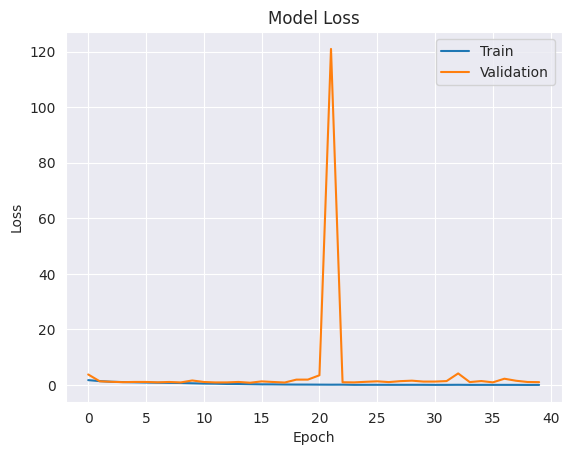

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

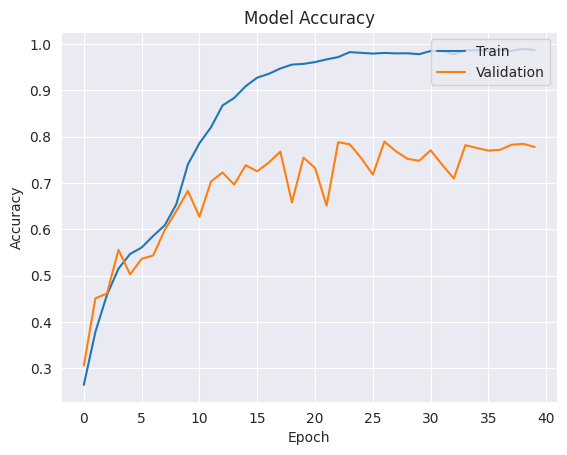

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'an Ahegao emotion'
    elif number==1:
        return 'an Angry emotion'
    elif number==2:
        return 'a Happy emotion'
    elif number==3:
        return 'a Neutral emotion'
    elif number==4:
        return 'a Sad emotion'
    elif number==5:
        return 'a Surprise emotion'

99.83325600624084% Confidence This Is a Happy emotion


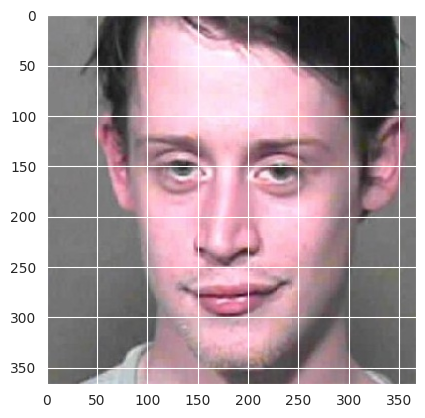

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/dataset/Happy/000be90a828409ffe480ba9b3b8bab5fcad49c341a535dacb289d849.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
model.save('emotion_model.keras')
